# Data Analyst Intern Assessment - Booking Data Analysis

**1. Introduction Section**

- This notebook analyzes booking data for a multi-service business. The dataset includes class bookings, 
subscriptions, facility rentals, and birthday party reservations. The goal is to clean the data, perform 
exploratory analysis, and present insights through an interactive dashboard.


**2. Import Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

**3. Load the Dataset**

In [2]:
df=pd.read_excel("DataAnalyst_Assesment_Dataset.xlsx")
df.head()

,Booking ID,Customer ID,Customer Name,Booking Type,Booking Date,Status,Class Type,Instructor,Time Slot,Duration (mins),Price,Facility,Theme,Subscription Type,Service Name,Service Type,Customer Email,Customer Phone
0,279d92c6-ce26-47c0-8915-e45b77fe20e2,00901ce3-3d86-4c97-bca2-40ccac2fb99f,Customer 1,Facility,2025-05-30,Pending,NaN,NaN,10:00:00,90.0,42.74,Party Room,NaN,NaN,Party Room,Facility,customer1@example.com,001-730-9034
1,415bfcbe-1a2e-4d4b-809a-4c5b606653b1,b82db986-bd52-4b07-bdd8-aa8cf2016241,Customer 2,Birthday Party,2025-05-29,Pending,NaN,NaN,NaN,NaN,182.06,Party Room,Superhero,NaN,Party Room,Birthday Party,customer2@example.com,001-537-5668
2,2100024b-46fc-47b5-ac1c-047d007a4723,6bbb6e83-9577-4f64-80b0-f073132d18f3,Customer 3,Birthday Party,2025-05-09,Confirmed,NaN,NaN,11:00:00,120.0,207.50,Play Area,NaN,NaN,Play Area,Facility,customer3@example.com,001-880-7769
3,74936def-088f-4d34-bad1-dfa76f78b704,f16f5beb-6a7d-4493-a19e-a30dbbd206e9,Customer 4,Birthday Party,2025-06-07,Pending,NaN,NaN,12:00:00,90.0,203.20,Play Area,NaN,NaN,Play Area,Birthday Party,customer4@example.com,001-491-3107
4,6272b4e7-a508-4ed7-bae0-21f7293287a8,eb297435-93d1-4e65-8dd4-6450922305cb,Customer 5,Class,2025-04-13,Pending,Art,NaN,15:00:00,120.0,161.14,NaN,NaN,NaN,Art,Class,customer5@example.com,001-718-3794


**4. Dataset Overview**

- Below, we check the basic structure of the dataset, including column names, data types, and missing values.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Booking ID         1000 non-null   object        
 1   Customer ID        1000 non-null   object        
 2   Customer Name      1000 non-null   object        
 3   Booking Type       1000 non-null   object        
 4   Booking Date       1000 non-null   datetime64[ns]
 5   Status             1000 non-null   object        
 6   Class Type         328 non-null    object        
 7   Instructor         270 non-null    object        
 8   Time Slot          795 non-null    object        
 9   Duration (mins)    795 non-null    float64       
 10  Price              1000 non-null   float64       
 11  Facility           672 non-null    object        
 12  Theme              273 non-null    object        
 13  Subscription Type  0 non-null      float64       
 14  Service N

In [4]:
df.duplicated().sum()

0

In [5]:
df.columns

Index(['Booking ID', 'Customer ID', 'Customer Name', 'Booking Type',
       'Booking Date', 'Status', 'Class Type', 'Instructor', 'Time Slot',
       'Duration (mins)', 'Price', 'Facility', 'Theme', 'Subscription Type',
       'Service Name', 'Service Type', 'Customer Email', 'Customer Phone'],
      dtype='object')

**5. Data Understanding**

- Understand each column to identify unique values, their counts, and any missing values.  
- This helps in detecting data inconsistencies and understanding the dataset better. 

In [6]:
df['Booking ID'].nunique()   

1000

In [7]:
df['Customer ID'].nunique() 

1000

In [8]:
df["Customer Name"].nunique() 

1000

**Observations**

- Drop identifier columns that don't add value to the analysis.
- 'Booking ID', 'Customer ID', and 'Customer Name' are unique for every record.
- While these columns can be useful for joining data or future reference,
- they do not contribute to understanding overall trends in the dataset.

In [9]:
df["Booking Type"].unique()

array(['Facility', 'Birthday Party', 'Class'], dtype=object)

In [10]:
df["Booking Type"].value_counts()

Booking Type
Facility          337
Birthday Party    335
Class             328
Name: count, dtype: int64

In [11]:
df['Booking Date'].unique()

<DatetimeArray>
['2025-05-30 00:00:00', '2025-05-29 00:00:00', '2025-05-09 00:00:00',
 '2025-06-07 00:00:00', '2025-04-13 00:00:00', '2025-05-10 00:00:00',
 '2025-05-18 00:00:00', '2025-04-23 00:00:00', '2025-05-19 00:00:00',
 '2025-06-02 00:00:00', '2025-04-08 00:00:00', '2025-04-20 00:00:00',
 '2025-06-11 00:00:00', '2025-06-04 00:00:00', '2025-04-06 00:00:00',
 '2025-03-26 00:00:00', '2025-04-25 00:00:00', '2025-03-31 00:00:00',
 '2025-05-13 00:00:00', '2025-05-20 00:00:00', '2025-03-30 00:00:00',
 '2025-06-10 00:00:00', '2025-06-03 00:00:00', '2025-04-26 00:00:00',
 '2025-04-24 00:00:00', '2025-06-15 00:00:00', '2025-05-01 00:00:00',
 '2025-04-27 00:00:00', '2025-03-28 00:00:00', '2025-05-26 00:00:00',
 '2025-03-25 00:00:00', '2025-06-05 00:00:00', '2025-05-15 00:00:00',
 '2025-05-08 00:00:00', '2025-05-04 00:00:00', '2025-06-22 00:00:00',
 '2025-04-01 00:00:00', '2025-04-14 00:00:00', '2025-05-14 00:00:00',
 '2025-05-05 00:00:00', '2025-06-13 00:00:00', '2025-05-07 00:00:00',
 '20

In [12]:
df['Status'].unique()

array(['Pending', 'Confirmed'], dtype=object)

In [13]:
df['Status'].value_counts()

Status
Pending      510
Confirmed    490
Name: count, dtype: int64

In [14]:
df['Class Type'].unique()  # some missing values present

array([nan, 'Art', 'Dance', 'Gymnastics'], dtype=object)

In [15]:
df['Class Type'].value_counts()

Class Type
Gymnastics    111
Art           110
Dance         107
Name: count, dtype: int64

In [16]:
df['Instructor'].unique()

array([nan, 'Amanda Davis', 'Lisa Hensley', 'James Howard'], dtype=object)

In [17]:
df['Instructor'].value_counts()

Instructor
Amanda Davis    90
Lisa Hensley    90
James Howard    90
Name: count, dtype: int64

In [18]:
df['Time Slot'].unique()

array([datetime.time(10, 0), nan, datetime.time(11, 0),
       datetime.time(12, 0), datetime.time(15, 0), datetime.time(16, 0),
       datetime.time(13, 0), datetime.time(9, 0), datetime.time(17, 0),
       datetime.time(14, 0)], dtype=object)

In [19]:
df['Time Slot'] = df['Time Slot'].apply(lambda x: x.strftime('%I %p') if pd.notnull(x) else 'Unknown')

In [20]:
df['Duration (mins)'].unique()

array([ 90.,  nan, 120.,  45.])

In [21]:
df['Duration (mins)'].value_counts()

Duration (mins)
90.0     283
45.0     264
120.0    248
Name: count, dtype: int64

In [22]:
df['Price'].nunique()

876

In [23]:
df['Facility'].unique()

array(['Party Room', 'Play Area', nan], dtype=object)

In [24]:
df['Facility'].value_counts()

Facility
Play Area     356
Party Room    316
Name: count, dtype: int64

In [25]:
df['Theme'].unique()

array([nan, 'Superhero', 'Sports', 'Princess'], dtype=object)

In [26]:
df['Theme'].value_counts()

Theme
Superhero    94
Sports       93
Princess     86
Name: count, dtype: int64

In [27]:
# Subscription Type is entirely null so it might not be useful, we can drop this column.
df['Subscription Type'].unique()

array([nan])

In [28]:
df['Service Name'].unique()

array(['Party Room', 'Play Area', 'Art', 'Dance', 'Gymnastics'],
      dtype=object)

In [29]:
df['Service Name'].value_counts()

Service Name
Play Area     356
Party Room    316
Gymnastics    111
Art           110
Dance         107
Name: count, dtype: int64

In [30]:
df['Service Type'].unique()

array(['Facility', 'Birthday Party', 'Class'], dtype=object)

In [31]:
df['Service Type'].value_counts()

Service Type
Facility          347
Birthday Party    329
Class             324
Name: count, dtype: int64

In [32]:
df['Customer Email'].nunique()

906

In [33]:
df['Customer Phone'].nunique()

895

**Observations**

-  Similarly, 'Customer Email' and 'Customer Phone' are intended for contacting purposes,they do not help with understanding the booking behavior or trends in the dataset.
-  so am dropping them too.

## Missing values Treatment

In [34]:
# Fill missing values

df['Instructor'].fillna('No Instructor', inplace=True)
df['Time Slot'].fillna('Unknown', inplace=True)
df['Duration (mins)'].fillna(df['Duration (mins)'].median(), inplace=True)
df['Facility'].fillna('Not Assigned', inplace=True)
df['Theme'].fillna('No Theme', inplace=True)

# some analysis on colums

In [35]:
a=df[df['Booking Type'].isin(['Facility', 'Birthday Party'])][['Booking Type','Class Type']]
a['Class Type'].unique()   # all NaN's

array([nan], dtype=object)

In [36]:
b=df[df['Class Type']=='Unknown'][['Class Type','Booking Type']]
b['Booking Type'].unique()    # values only present for class type not for Facility and Birthday Party

array([], dtype=object)

**Observations**

- The null values in the Class Type column occur only for bookings categorized as "Facility" and "Birthday Party".
- Only bookings with the type "Class" have non-null values, indicating that Class bookings are further segmented.
- The values present for Class bookings include specific types such as Art, Dance, and Gymnastics.

In [37]:
c=df[df['Instructor']=='No Instructor'][['Booking Type','Class Type']]
c[c['Booking Type']=='Class'].shape

# it's okay to have No Instructor for Facility and Birthday Party , but for class , some instructor should be there 

(58, 2)

**Observations**

- It's acceptable for Facility and Birthday Party bookings to have "No Instructor" since these services typically do not require one.
-  For Class bookings, however, an instructor should be assigned, so any "No Instructor" entries in Class bookings may indicate a data quality issue or missing information that should be addressed.

**Observation**

- The Facility column contains some missing values; however, since similar information is present in the Service Name column, I will drop the Facility column and retain Service Name for analysis.

In [38]:
c=df[['Theme','Booking Type']]
c[c['Theme']!='No Theme']['Booking Type'].unique()

array(['Birthday Party'], dtype=object)

In [39]:
df['Theme'].value_counts()

Theme
No Theme     727
Superhero     94
Sports        93
Princess      86
Name: count, dtype: int64

In [40]:
c[c['Theme']=='No Theme']['Booking Type'].unique()

array(['Facility', 'Birthday Party', 'Class'], dtype=object)

In [41]:
c[(c['Theme']=='No Theme')&(c['Booking Type']=='Birthday Party')].shape

# Theme less Birthday parties are 62 

(62, 2)

**Observation**

- The Theme column is used exclusively for Birthday Party bookings.
- Some Birthday Party entries have no theme, which is acceptable as not all birthday parties are assigned a theme.

In [42]:
d=df[['Class Type','Service Name']]
d[d['Class Type']=='Unknown']['Service Name'].unique()

array([], dtype=object)

In [43]:
d[d['Class Type']=='Unknown'].shape

(0, 2)

**Observation**

- The Class Type column has 672 missing values.
- The detailed information present in the Class Type column is already available in the Service Name column.
- Therefore, I will drop the Class Type column and retain the Service Name column for further analysis.

In [44]:
df[['Booking Type','Service Type']]

,Booking Type,Service Type
0,Facility,Facility
1,Birthday Party,Birthday Party
2,Birthday Party,Facility
3,Birthday Party,Birthday Party
4,Class,Class
...,...,...
995,Birthday Party,Birthday Party
996,Class,Class
997,Facility,Facility
998,Facility,Facility


In [45]:
# service type , booking type have same unique values but some rows are not maching what it means
mismatched_rows = df[df['Booking Type'] != df['Service Type']]
mismatched_rows[['Booking Type','Service Type']].shape

(305, 2)

## dropping UnImportant columns

In [46]:
df.drop(['Booking ID', 'Customer ID', 'Customer Name','Class Type','Facility','Subscription Type','Customer Email', 'Customer Phone'],axis=1,inplace=True)

In [47]:
df.head(2)

,Booking Type,Booking Date,Status,Instructor,Time Slot,Duration (mins),Price,Theme,Service Name,Service Type
0,Facility,2025-05-30,Pending,No Instructor,10 AM,90.0,42.74,No Theme,Party Room,Facility
1,Birthday Party,2025-05-29,Pending,No Instructor,Unknown,90.0,182.06,Superhero,Party Room,Birthday Party


In [48]:
df['Time Slot'].unique()

array(['10 AM', 'Unknown', '11 AM', '12 PM', '03 PM', '04 PM', '01 PM',
       '09 AM', '05 PM', '02 PM'], dtype=object)

In [49]:
df[df['Booking Type']=='Class']['Service Name'].value_counts()

Service Name
Gymnastics    111
Art           110
Dance         107
Name: count, dtype: int64

In [50]:
df[df['Booking Type']!='Class']['Service Name'].value_counts()

Service Name
Play Area     356
Party Room    316
Name: count, dtype: int64

**6. Exploratory Data Analysis (EDA)**

- We now explore trends, distributions, and relationships in the data using visualizations. 

**1st**

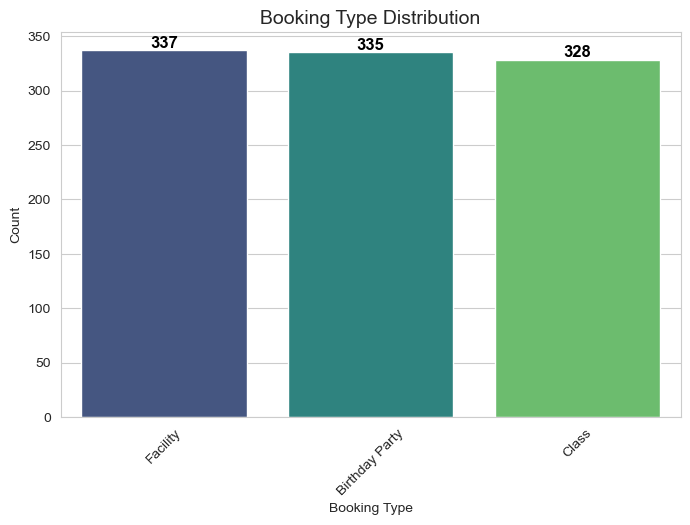

In [51]:
# Booking Type Frequency Analysis


# Set style for better visuals
sns.set_style("whitegrid")

# Booking Type Distribution
plt.figure(figsize=(8, 5))
ax=sns.countplot(data=df, x="Booking Type", hue="Booking Type", palette="viridis", 
              order=df["Booking Type"].value_counts().index, legend=False)

# Add text labels on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Convert height to int for clean labels
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Positioning
                ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

plt.title("Booking Type Distribution", fontsize=14)
plt.xlabel("Booking Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

**Observations**
  
- The dataset contains three main booking types: Facility, Birthday Party, and Class.
- The number of bookings in each category is almost equal, meaning no single type dominates the overall demand.
- This balanced distribution suggests that customers use all three services in a similar proportion, and the business does not heavily rely on just one type of booking.

**2nd**

In [52]:
# monthly Trends 

import calendar

df['Month'] = pd.to_datetime(df['Booking Date']).dt.month
monthly_revenue = df.groupby('Month')['Price'].sum().reset_index()
monthly_revenue['Month'] = monthly_revenue['Month'].apply(lambda x: calendar.month_name[x])
monthly_revenue

,Month,Price
0,March,11550.86
1,April,46692.01
2,May,45389.75
3,June,35844.59


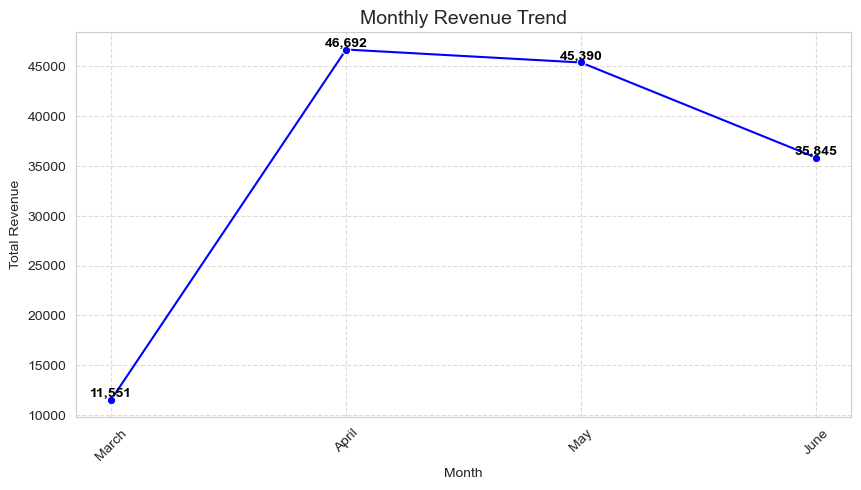

In [53]:
# Plot Monthly Revenue Trend
plt.figure(figsize=(10, 5))
ax = sns.lineplot(data=monthly_revenue, x="Month", y="Price", marker="o", color="b")

# Add labels to each point
for i, row in monthly_revenue.iterrows():
    plt.text(row["Month"], row["Price"], f"{row['Price']:,.0f}", 
             ha="center", va="bottom", fontsize=10, fontweight="bold", color="black")

plt.title("Monthly Revenue Trend", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.7)  # Add grid for better readability
plt.show()

**Observations**

- The highest revenue was recorded in April ( 46,692) and May ( 45,389).
- There was a noticeable decline in June, which could be due to seasonal factors like the end of school sessions or changes in customer behavior.
- Understanding these patterns can help the business prepare for peak months and offer promotions or discounts in slow months to balance revenue.

**3rd**

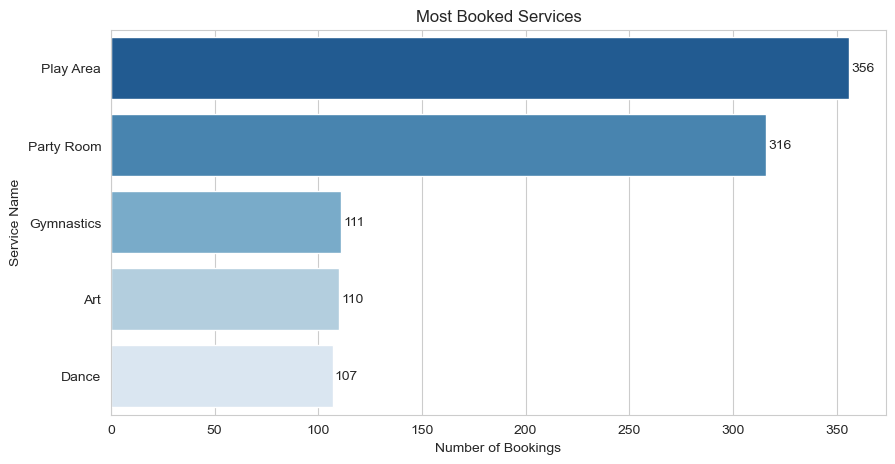

In [54]:
# Top booked services
top_services = df['Service Name'].value_counts()
plt.figure(figsize=(10,5))
a=sns.barplot(x=top_services.values, y=top_services.index, hue=top_services.index, palette="Blues_r", legend=False)

# Add values on bars
for index, value in enumerate(top_services.values):
    a.text(value + 1, index, str(value), va='center', fontsize=10)  # Adjust position

plt.xlabel("Number of Bookings")
plt.ylabel("Service Name")
plt.title("Most Booked Services")
plt.show()

**Observations**

- Among all available services, Play Area and Party Room are the most frequently booked.
- Gymnastics, Art, and Dance services have relatively fewer bookings, but they still contribute significantly to the overall business.
- This could indicate that people prefer facility-based activities (like Play Area and Party Room) more than structured classes.
- If the business wants to increase bookings for Art, Dance, and Gymnastics, they might consider marketing strategies like offering package deals or trial classes.

**4th**

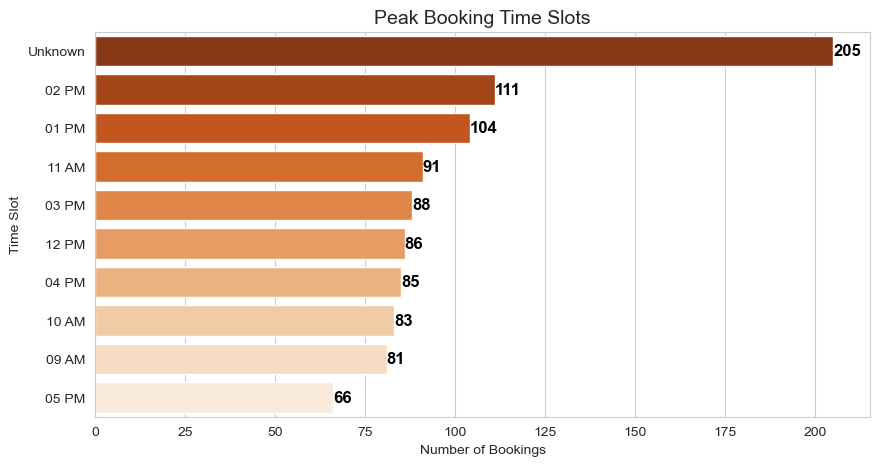

In [55]:
# Peak Booking Hours

peak_hours = df['Time Slot'].value_counts().reset_index()
peak_hours.columns = ['Time Slot', 'Bookings']

plt.figure(figsize=(10, 5))
ax = sns.barplot(x='Bookings', y='Time Slot', hue='Time Slot', data=peak_hours, palette='Oranges_r', legend=False)

# Add values on bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height()/2),
                ha='left', va='center', fontsize=12, color='black', fontweight='bold')

# Labels & Title
plt.xlabel("Number of Bookings")
plt.ylabel("Time Slot")
plt.title("Peak Booking Time Slots", fontsize=14)
plt.show()

**Observations**

- The majority of bookings occur during the morning hours— 11 AM to 2 PM.
- Fewer bookings are observed in the late afternoon ( afetr 4 PM and above 10 AM).
- This suggests that customers prefer scheduling their activities in the morning and early afternoon, possibly to align with their daily routines.
- The business could offer discounts for less popular time slots or introduce new activities to attract customers in the afternoon.

**5th**

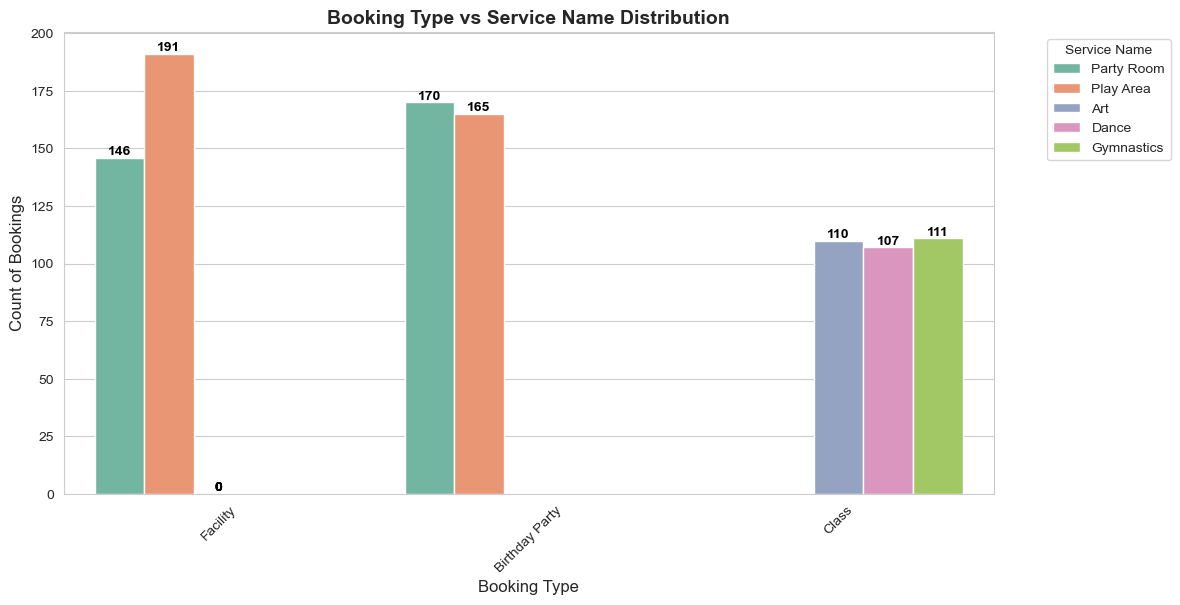

In [56]:
# Breakdown of Services Under Each Booking Type

plt.figure(figsize=(12, 6))

# Use a better color palette
ax = sns.countplot(data=df, x="Booking Type", hue="Service Name", palette="Set2")

# Add text labels on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  
                (p.get_x() + p.get_width() / 2., p.get_height()),  
                ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

# Labels and Titles
plt.xlabel("Booking Type", fontsize=12)
plt.ylabel("Count of Bookings", fontsize=12)
plt.title("Booking Type vs Service Name Distribution", fontsize=14, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Move legend outside
plt.legend(title="Service Name", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

**Observations**

- For Facility and Birthday Party bookings, the most commonly used spaces are Party Room and Play Area.
- On the other hand, Class bookings are linked to structured activities like Gymnastics, Art, and Dance.
- This separation shows that different booking types serve distinct customer needs—some prefer unstructured play areas, while others opt for organized classes.

**6th**

In [57]:
df.groupby('Service Name')['Price'].sum()

Service Name
Art           14611.26
Dance         15474.94
Gymnastics    15480.18
Party Room    43762.19
Play Area     50148.64
Name: Price, dtype: float64

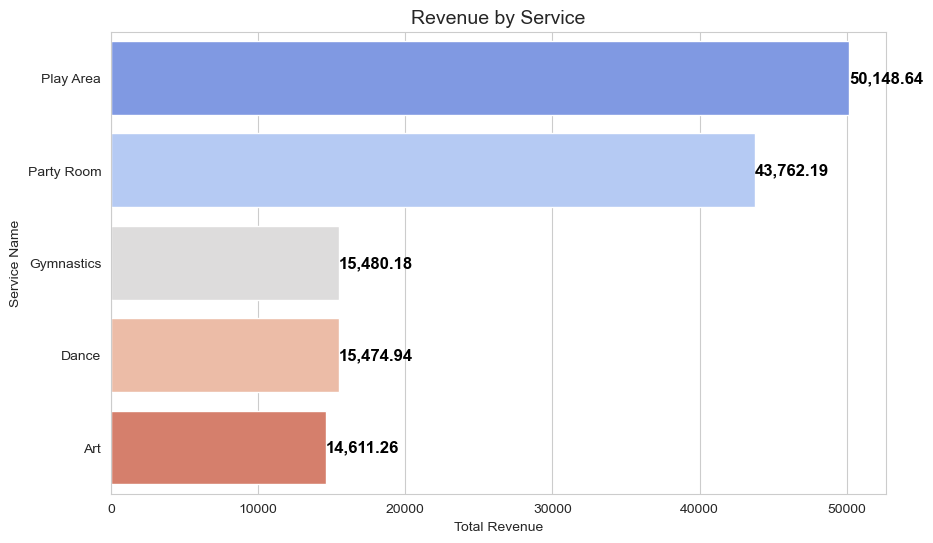

In [58]:
service_revenue = df.groupby('Service Name')['Price'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=service_revenue.values, y=service_revenue.index, hue=service_revenue.index, palette="coolwarm", legend=False)

# Add values on bars
for p in ax.patches:
    ax.annotate(f'{p.get_width():,.2f}', (p.get_width(), p.get_y() + p.get_height()/2),
                ha='left', va='center', fontsize=12, color='black', fontweight='bold')

# Labels & Title
plt.xlabel("Total Revenue")
plt.ylabel("Service Name")
plt.title("Revenue by Service", fontsize=14)
plt.show()

**Observations**

- Play Area generates the highest revenue ( 50,148 ), followed by Party Room ( 43,762 ).
- Structured services like Art, Dance, and Gymnastics contribute less to revenue but still play a valuable role.
- Since Play Area and Party Room are the biggest revenue sources, the business could focus on expanding or enhancing these facilities to maximize profits.
- Meanwhile, adding membership programs or long-term packages for Art, Dance, and Gymnastics could boost their revenue.

**7th**

In [59]:
# Price on Weekends vs. Weekdays 

df['Weekday'] = df['Booking Date'].dt.day_name()
df['Weekday'].value_counts()

# weekend_prices = df.groupby('Weekend')['Price'].mean().reset_index()
# weekend_prices

Weekday
Saturday     153
Monday       152
Sunday       148
Wednesday    147
Thursday     141
Friday       131
Tuesday      128
Name: count, dtype: int64

**Observations**

- The highest number of bookings happen on Saturdays and Sundays, indicating that weekends are the busiest days for the business.
- Friday and Monday also see a good number of bookings, possibly from people extending their weekend plans or attending scheduled classes.
- Since weekends are naturally high-demand, the business could increase pricing slightly for weekend bookings while offering weekday discounts to attract more customers during slower days.

In [60]:
df.to_excel("DataAnalyst_Assesment_Dataset_cleaned_data.xlsx", index=False)